<a href="https://colab.research.google.com/github/erinijapranckeviciene/MLdata/blob/main/SMA_projekto_idejos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pasirinktų tinklo duomenų iš snap.stanford.edu  tinklo parametrų analizė / tyrimas
### Projekto idėja ir galimi tyrimo klausimai yra demonstruojami su Juditos (personažų) tinklo duomenimis

In [2]:
# ikeliam duomenis is Github
# 
import pandas as pd
url="https://raw.githubusercontent.com/erinijapranckeviciene/MLdata/main/Juditos_tinklo_parametrai.csv"
data = pd.read_csv(url)

In [4]:
data.describe()

,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,SelfLoops,Stress,TopologicalCoefficient
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.0,107.000000,107.0,107.000000,107.0,107.000000,107.000000
mean,2.903897,0.018132,0.354736,0.551443,6.579439,4.841121,13.942434,0.0,6.579439,0.0,0.947114,0.0,927.925234,0.329108
std,0.507002,0.044063,0.061777,0.347251,6.611935,0.601092,5.524427,0.0,6.611935,0.0,0.014083,0.0,2083.404415,0.193539
min,1.952830,0.000000,0.222689,0.000000,1.000000,3.000000,4.000000,0.0,1.000000,0.0,0.903040,0.0,0.000000,0.000000
25%,2.632075,0.000000,0.327164,0.290850,2.000000,4.500000,10.675000,0.0,2.000000,0.0,0.942872,0.0,0.000000,0.183933
50%,2.896226,0.000609,0.345277,0.571429,4.000000,5.000000,14.000000,0.0,4.000000,0.0,0.947327,0.0,42.000000,0.355191
75%,3.056604,0.007961,0.379928,0.833333,7.000000,5.000000,17.562500,0.0,7.000000,0.0,0.954665,0.0,526.000000,0.459070
max,4.490566,0.229965,0.512077,1.000000,36.000000,6.000000,36.000000,0.0,36.000000,0.0,0.973532,0.0,10346.000000,0.741379


Nulinius stulpelius ir kitus požymius kurių nenaudosim reikia pašalinti.  

In [7]:
print(data.dtypes)

AverageShortestPathLength       float64
BetweennessCentrality           float64
ClosenessCentrality             float64
ClusteringCoefficient           float64
Degree                            int64
Eccentricity                      int64
IsSingleNode                       bool
name                             object
NeighborhoodConnectivity        float64
NumberOfDirectedEdges             int64
NumberOfUndirectedEdges           int64
PartnerOfMultiEdgedNodePairs      int64
Radiality                       float64
selected                           bool
SelfLoops                         int64
shared name                      object
Stress                            int64
TopologicalCoefficient          float64
dtype: object


# Klausimas kurį galima klausti pasitelkiant regresiją.
## Tinklo parametras "Betweennes centrality" parodo kaip labai konkretus tinklo mazgas įtakoja sąveikas tarp kitų tinklo mazgų. Ar pagal kitus tinklo parametrus galima būtų prognozuoti "Betweennes centrality" ? Ar tiesinė prognozė čia tinka?  

#### toks uždavinys turėtų prasmę kada mes norėtume modeliuoti situacijas - kada manipuliuodami tinklo ryšius - kažkokiu būdu formuodami sujungimus - pastiprinti kai kurių tiklo "aktorių" poveikį kitiems tiklo "aktoriams", daryti įtaką per konkrečius mazgus. Galėtume gal pamatyti kokios "aktoriaus" charakteristikos labiausiai lemia jo poveikius ir tada jas keisti.   

In [11]:
df=pd.DataFrame(data)
y=df[['BetweennessCentrality']]
# o gal reikia nufiltruoti šį parametrą , nes matome kad trečdalis mazgų turi nulinę vertę? 
X=df[['ClosenessCentrality','ClusteringCoefficient','Degree','NeighborhoodConnectivity','TopologicalCoefficient']]
# ar nėra Degree kintamąjame išskirčių? Kaip jas reiktų pašalinti? Ar regresijos modeliai yra gerseni (R2 požiūriu) po to kada pašalinam išskirtis 


In [12]:
X.head

<bound method NDFrame.head of      ClosenessCentrality  ...  TopologicalCoefficient
0               0.325153  ...                0.000000
1               0.339744  ...                0.000000
2               0.250000  ...                0.000000
3               0.340836  ...                0.569444
4               0.329193  ...                0.000000
..                   ...  ...                     ...
102             0.479638  ...                0.176505
103             0.392593  ...                0.480769
104             0.384058  ...                0.183740
105             0.330218  ...                0.437500
106             0.389706  ...                0.350000

[107 rows x 5 columns]>

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [22]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

lr = LinearRegression()
lasso = Lasso() # gal reikia patikrinti alfa - nes Lasso iš viso neveikia čia
ridge = Ridge()
#knn = KNeighborsRegressor()
#knn1 = KNeighborsRegressor(n_neighbors=1)
#knn9 = KNeighborsRegressor(n_neighbors=9)
#gp = GaussianProcessRegressor()


for model in [lr, lasso, ridge]:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(model)    
    print(model.coef_)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[[-0.02329083 -0.02517337  0.00487307 -0.00017298  0.02370176]]
	Explained variance: 0.6256101970010313
	Mean absolute error: 0.01914876432611324
	R2 score: 0.6220278099587984

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
[ 0. -0.  0. -0. -0.]
	Explained variance: 2.220446049250313e-16
	Mean absolute error: 0.03609271830105391
	R2 score: -0.12166575012410252

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
[[-0.00055028 -0.01497272  0.00467512 -0.00027192  0.00469611]]
	Explained variance: 0.6259779300764563
	Mean absolute error: 0.01924107161553199
	R2 score: 0.6224564471841018



# Gal vizualizavimas kaip kad "pairwise scatterplot" padėtų atsakyti kokio tipo ryšiai tarp kintamųjų ir ar galim tikėtis gero regresijos modelio? 

# Klausimas kurį galima klausti pasitelkiant klasifikavimą.
## Kadangi daug tinklo aktorių turi  "Betweennes centrality" (BC) artimą nuliui, bandykim išssiaiškinti ar tinklo aktoriai pagal kitus tinklo parametrus gali būti klasifikuojami į tuos kurie turi poveikį ir tuos kurie neturi? Kokios taisyklės čia veikia?  Turbūt tokiam uždaviniui turi tikti Sprendimų medžio klasifikatorius.  



Turim suskirstyti tinklo aktorius į klases ir suformuoti klasių žymes. Klasė "Turi įtaką " yra tie aktoriai kurių BC yra ženkliau didesnis už medianą  >0.009 , o klasė " Neturi įtakos" kurie mažesni. 

In [29]:
y_r = y
y = y_r > 0.009
print(y)
y.replace(True,'Itakoja', inplace=True)
y.replace(False,'NEitakoja', inplace=True)
print(y)

     BetweennessCentrality
0                    False
1                    False
2                    False
3                    False
4                    False
..                     ...
102                   True
103                  False
104                   True
105                  False
106                  False

[107 rows x 1 columns]
    BetweennessCentrality
0               NEitakoja
1               NEitakoja
2               NEitakoja
3               NEitakoja
4               NEitakoja
..                    ...
102               Itakoja
103             NEitakoja
104               Itakoja
105             NEitakoja
106             NEitakoja

[107 rows x 1 columns]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print("Training features/target:", X_train.shape, y_train.shape)
print("Testing features/target:", X_test.shape, y_test.shape)
y_train.value_counts()
y_test.value_counts()

Training features/target: (80, 5) (80, 1)
Testing features/target: (27, 5) (27, 1)


BetweennessCentrality
NEitakoja                16
Itakoja                  11
dtype: int64

# Sprendimų medis

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X, y)
tree.score(X, y)

0.9065420560747663

# Kurie požymiai yra svarbiausi

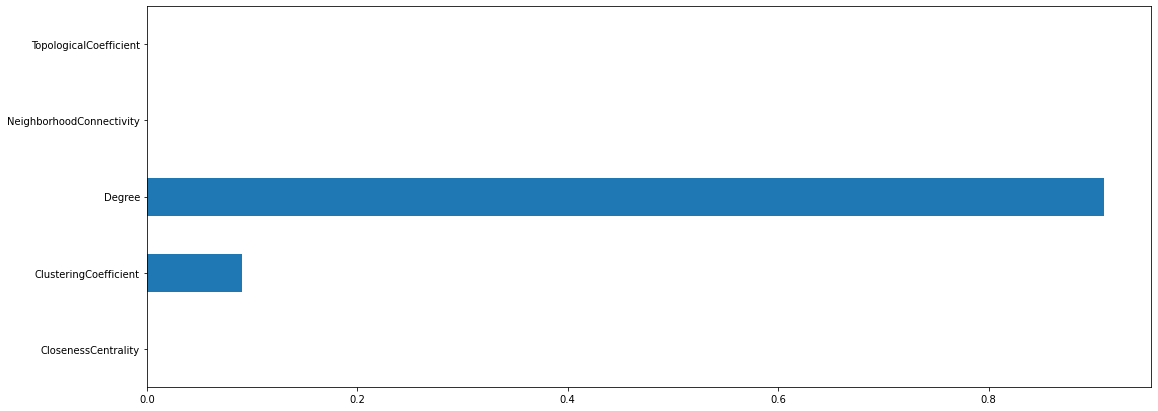

In [32]:
%matplotlib inline
pd.Series(tree.feature_importances_, index=X.columns).plot.barh(figsize=(18,7));

### Ką reiškia šie požymiai kad jie atrodo svarbiausi atkiriant tinklo "aktorius" į tuos kurie įtakoja kitus ir tuos kurie ne? 

Kokios taisyklės veikia šiam sprendimų medyje?

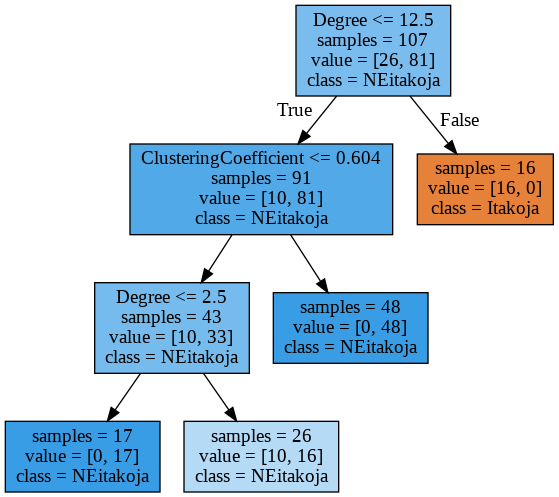

In [34]:
# Figure out where graphviz executable lives
dotpath = !which dot
from sklearn.tree import export_graphviz
import sys, subprocess
from IPython.display import Image

export_graphviz(tree, feature_names=X.columns, class_names=['Itakoja','NEitakoja'],
                out_file='ml-good.dot', impurity=False, filled=True)
subprocess.check_call([dotpath[0],'-Tpng','ml-good.dot','-o','ml-good.png'])
Image('ml-good.png')

###  Turim informaciją kurią galim interpretuoti- "aktoriai" kurie įtakoja kitus šiame tinkle turi ryšius su daugiau negu 12 kitų "aktorių".  Toliau matom kad yra grupė aktorių (N=10) kurie pagal mūsų suskirstymą į klases nors priskirti neįtakojančių klasei, vistik turi žymes "Įtakoja".  Taip galėjo atsitikti todėl kad mūsų padalinimo į klases kriterijus nėra visai tikslus, reikėtų pasižiūrėti kokios BC reikšmės yra priskirtos tiems "aktoriams".  

Toliau galim būtų tirt sprendimų medžio modelį su mokymo ir testiniais duomenimis, bei keisti jo gylį. 

# Klausimas kurį galima klausti pasitelkiant klasterizavimą.
## Įkiek grupių natūraliausiai grupuojasi visi tinklo aktoriai pagal pasirinktus tinklo parametrus ir kokie aktoriai yra tose grupėse? Kokie požymiai vienija tas grupes? 



Iliustruosim su taip pačiais požymiais kuriuos naudojom regresijai ir klasifikavimui išskyrus "Degree"

In [35]:
X=df[['ClosenessCentrality','ClusteringCoefficient','NeighborhoodConnectivity','TopologicalCoefficient']]
name=df[['name']]

In [36]:
print(name)

        name
0     Walton
1      Doran
2    Shireen
3    Chataya
4     Ramsay
..       ...
102    Jaime
103    Aerys
104  Samwell
105    Grenn
106    Aemon

[107 rows x 1 columns]


In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

inertia=np.zeros(shape=(1,10))
kn=np.zeros(shape=(1,10))
for k in [0,1,2,3,4,5,6,7,8,9]:
    kmeans = KMeans(n_clusters=k+1, n_init=100)
    y_pred = kmeans.fit_predict(X)
    print("clusters: ",k+1, "inertia: ",kmeans.inertia_)
    inertia[0,k]=kmeans.inertia_
    kn[0,k]=k+1

clusters:  1 inertia:  3252.2016041291654
clusters:  2 inertia:  1346.8889356611485
clusters:  3 inertia:  649.396272334577
clusters:  4 inertia:  377.2707595353017
clusters:  5 inertia:  248.95328225275625
clusters:  6 inertia:  158.57020815648912
clusters:  7 inertia:  113.43847663866408
clusters:  8 inertia:  72.32606425013716
clusters:  9 inertia:  54.26389678595632
clusters:  10 inertia:  44.21676710626605


Text(0, 0.5, 'inertia')

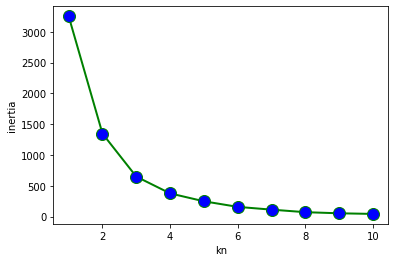

In [39]:
plt.plot(kn[0,:],inertia[0,:],color='green', marker='o', markerfacecolor='blue',linestyle='solid', linewidth=2, markersize=12)
plt.xlabel('kn')
plt.ylabel('inertia')

Kiek čia klasterių natūraliai susidaro? 
Galima sumažinti matumą ir pasižiūrėti kaip duomenys grupuojasi (PCA ir klasterizavimo sasiuvinuko).
Pasižiūrėkim kas sudaro keturis klasterius. 

In [41]:
kmeans = KMeans(n_clusters=4, n_init=100)
y_pred = kmeans.fit_predict(X)

In [42]:
print(y_pred)

[3 3 0 2 3 2 2 2 1 1 2 0 1 1 1 2 1 1 3 1 1 2 1 2 1 1 1 2 3 1 1 2 0 0 0 1 2
 0 1 0 1 0 1 0 0 0 0 0 1 1 2 2 2 2 2 2 1 0 1 2 1 2 1 1 1 1 1 2 2 2 2 0 1 0
 0 1 0 1 0 1 2 1 1 2 2 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 3 0 1 1]


In [43]:
print(name[y_pred==0])

          name
2      Shireen
11      Lancel
32   Salladhor
33     Cressen
34       Davos
37     Rhaegar
39   Missandei
41       Jorah
43    Daenerys
44        Irri
45       Drogo
46      Daario
47        Karl
57      Roslin
71         Nan
73       Luwin
74       Jojen
76     Illyrio
78      Belwas
85         Jon
92       Beric
96       Amory
97       Mance
100     Tyrion
104    Samwell


In [45]:
print(name[y_pred==3])

       name
0    Walton
1     Doran
4    Ramsay
18    Orell
28   Qyburn
103   Aerys


In [57]:
X.loc[[0,1,4,18,28,103],:]

,ClosenessCentrality,ClusteringCoefficient,NeighborhoodConnectivity,TopologicalCoefficient
0,0.325153,0.0,24.0,0.000000
1,0.339744,0.0,36.0,0.000000
4,0.329193,0.0,25.0,0.000000
18,0.325153,0.0,26.0,0.000000
28,0.325153,0.0,24.0,0.000000
103,0.392593,1.0,25.0,0.480769


In [60]:
print(name[y_pred==2])


        name
3    Chataya
5    Rickard
6       Mace
7    Ellaria
10    Olenna
15      Styr
21  Myrcella
23     Kevan
27     Renly
31    Eddard
36   Viserys
50      Shae
51   Pycelle
52     Meryn
53      Ilyn
54      Elia
55   Stannis
59     Petyr
61     Jeyne
67   Podrick
68     Bronn
69   Brienne
70     Theon
80     Balon
83     Roose
84    Rickon


In [63]:
X.loc[[3,5,6,7,10,69,70,80,83,84],:]

,ClosenessCentrality,ClusteringCoefficient,NeighborhoodConnectivity,TopologicalCoefficient
3,0.340836,1.000000,20.500000,0.569444
5,0.330218,1.000000,16.500000,0.660000
6,0.348684,1.000000,21.666667,0.528455
7,0.341935,1.000000,21.500000,0.581081
10,0.340836,1.000000,17.500000,0.648148
69,0.388278,0.619048,18.000000,0.339623
70,0.373239,0.833333,17.750000,0.377660
80,0.406130,0.800000,21.666667,0.355191
83,0.358108,0.666667,17.250000,0.466216
84,0.378571,0.800000,16.666667,0.340136


### Matome kad klasterių aiškiai skiriasi tinklo parametrai. Tad ką reiškia didelis "TopologicalCoefficient" klasteryje 2 lyginant su nuliu klasteryje 3 ?  Kokiu būdu šitas rodiklis charakterizuoja tinklo "aktorius" priklausančius klasteriui?  Matom taip pat kad skiriasi ir "ClusteringCoefficient" tarp šių klasterių. Tad kaip didesnės ClusteringCoefficient ir TopologicalCoefficient vertės kartu paėmus charakterizuoja klasterį 2?  